In [1]:
import model_loader
import pipeline
from PIL import Image
from transformers import CLIPTokenizer
import torch


Using device cpu


100%|██████████| 20/20 [06:43<00:00, 20.16s/it]


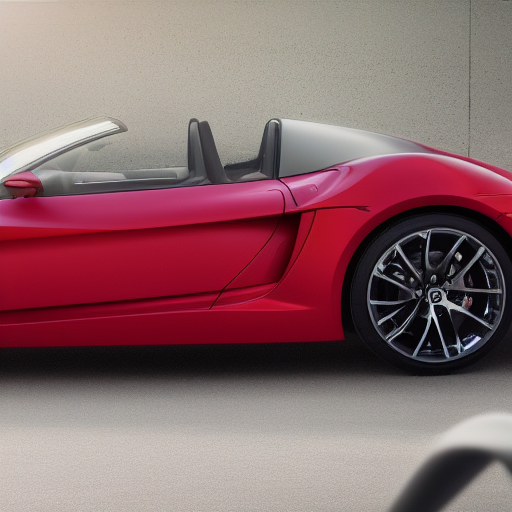

In [2]:
DEVICE = "cpu"

ALLOW_CUDA = False
ALLOW_MPS = False

if torch.cuda.is_available() and ALLOW_CUDA:
    DEVICE = "cuda"
elif (torch.has_mps or torch.backend.mps.is_available()) and ALLOW_MPS:
    DEVICE = "mps"

print(f"Using device {DEVICE}")

tokenizer = CLIPTokenizer("../data/tokenizer_vocab.json",merges_file="../data/tokenizer_merges.txt")
model_file = "../data/v1-5-pruned-emaonly.ckpt"
models = model_loader.preload_model_from_standard_weights(model_file,DEVICE)

##text2img
prompt = "a sports car, highly detailed, ultra sharp"
uncond_prompt = "" # use as neg prompt
do_cfg = True
cfg_scale = 7

#img2img
input_image = None
image_path = "../img/Veyron_SS.jpg"
# input_image = Image.open(image_path)
strength = 0.9

sampler = "ddpm"
num_inference_steps = 20
seed = None

output_image = pipeline.generate(
    prompt=prompt,
    uncond_prompt=uncond_prompt,
    input_image=input_image,
    strength=strength,
    do_cfg=do_cfg,
    cfg_scale=cfg_scale,
    sampler_name=sampler,
    n_inference_steps=num_inference_steps,
    seed=seed,
    models=models,
    device=DEVICE,
    idle_device='cpu',
    tokenizer=tokenizer
)

Image.fromarray(output_image)